# This is a notebook for analysing univariate statistics and visualizing using GSLIB library

In [6]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python

In [7]:
data=pd.read_csv(r"C:\Users\Hp\Downloads\project_data.csv")
data.head(15)

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI
0,2,50.0,850.0,1.0,0.090611,5.117354,3786.436225
1,3,50.0,800.0,1.0,0.101328,9.306003,2985.315030
2,5,50.0,700.0,1.0,0.118637,2724.882727,3174.257858
3,6,50.0,650.0,1.0,0.122391,800.419734,4371.515366
4,7,50.0,600.0,1.0,0.108202,3370.291282,2624.985174
5,9,50.0,500.0,1.0,0.105749,3835.242908,3974.477021
6,10,50.0,450.0,1.0,0.094204,745.386536,4638.884469
7,13,50.0,300.0,0.0,0.070700,14.349151,6050.464410
8,14,50.0,250.0,0.0,0.053582,1.062599,5789.277853
9,15,50.0,200.0,1.0,0.072368,1.055740,6378.448875


In [11]:
data.drop('Unnamed: 0',axis=1)
data=data[['X','Y','Facies','Porosity','Perm','AI']]
data.head()

,X,Y,Facies,Porosity,Perm,AI
0,50.0,850.0,1.0,0.090611,5.117354,3786.436225
1,50.0,800.0,1.0,0.101328,9.306003,2985.315030
2,50.0,700.0,1.0,0.118637,2724.882727,3174.257858
3,50.0,650.0,1.0,0.122391,800.419734,4371.515366
4,50.0,600.0,1.0,0.108202,3370.291282,2624.985174


In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,291.0,445.223368,287.564448,0.000000,200.000000,450.000000,700.000000,980.000000
Y,291.0,558.515464,256.373251,9.000000,350.000000,600.000000,750.000000,989.000000
Facies,291.0,0.762887,0.426045,0.000000,1.000000,1.000000,1.000000,1.000000
Porosity,291.0,0.085675,0.015941,0.053582,0.073647,0.083169,0.094496,0.130574
Perm,291.0,373.806377,990.615302,0.024186,5.586733,29.794540,216.359583,9141.540902
AI,291.0,4636.269980,1053.869515,2214.427809,3835.674219,4614.220120,5410.443474,7240.220496


In [14]:
print('The minimum is ' + str(round((data['Porosity'].values).min(),2)) + '.')
print('The maximum is ' + str(round((data['Porosity'].values).max(),2)) + '.')
print('The standard deviation is ' + str(round((data['Porosity'].values).std(),2)) + '.')
print('The standard deviation is ' + str(round((data['Porosity'].values).std(),2)) + '.')

The minimum is 0.05.
The maximum is 0.13.
The standard deviation is 0.02.
The standard deviation is 0.02.


In [15]:

print('The range (maximum - minimum) is ' + str(round(np.ptp(data['Porosity'].values),2)))
print('The P10 is ' + str(round(np.percentile(data['Porosity'].values,10),3)))
print('The P50 is ' + str(round(np.percentile(data['Porosity'].values,50),3)))
print('The P90 is ' + str(round(np.percentile(data['Porosity'].values,90),3)))
print('The P13 is ' + str(round(np.percentile(data['Porosity'].values,13),3)))
print('The media (P50) is ' + str(round(np.median(data['Porosity'].values),3)))
print('The mean is ' + str(round(np.mean(data['Porosity'].values),3)))

The range (maximum - minimum) is 0.08
The P10 is 0.067
The P50 is 0.083
The P90 is 0.109
The P13 is 0.069
The media (P50) is 0.083
The mean is 0.086


### The NumPy command average allows for weighted averages as in the case of statistical expectation and declutered statistics. For demonstration, lets make a weighting array and apply it.

In [18]:
nd = len(data)  
print(nd) # get the number of data values
wts = np.ones(nd)                         # make an array of nd length of 1's
print('The equal weighted average is ' + str(round(np.average(data['Porosity'].values,weights = wts),3)) + ', the same as the mean above.')

291
The equal weighted average is 0.086, the same as the mean above.


### SciPy stats functions provide a handy summary statistics function. The output is a 'list' of values (actually it is a SciPy.DescribeResult ojbect). One can extract any one of them to use in a workflow as follows.

In [20]:
print(stats.describe(data['Porosity'].values))                # summary statistics   
por_stats = stats.describe(data['Porosity'].values)           # store as an array
print('Porosity kurtosis is ' + str(round(por_stats[5],2))) # extract a statistic

DescribeResult(nobs=291, minmax=(0.05358198856528379, 0.13057400109664508), mean=0.08567504582945078, variance=0.00025413073426972817, skewness=0.6938555303625061, kurtosis=0.029341612332211664)
Porosity kurtosis is 0.03


# Plotting Distributions with GSLIB

In [21]:
GSLIB.hist

<function geostatspy.GSLIB.hist(array, xmin, xmax, log, cumul, bins, weights, xlabel, title, fig_name)>

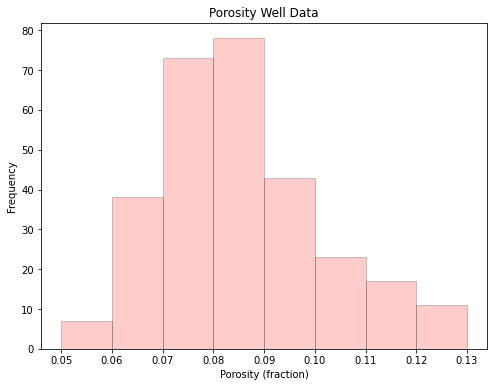

In [23]:
pormin = 0.05; pormax = 0.13
GSLIB.hist(data['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=8,weights = None, xlabel='Porosity (fraction)',title='Porosity Well Data',fig_name='hist_Porosity')

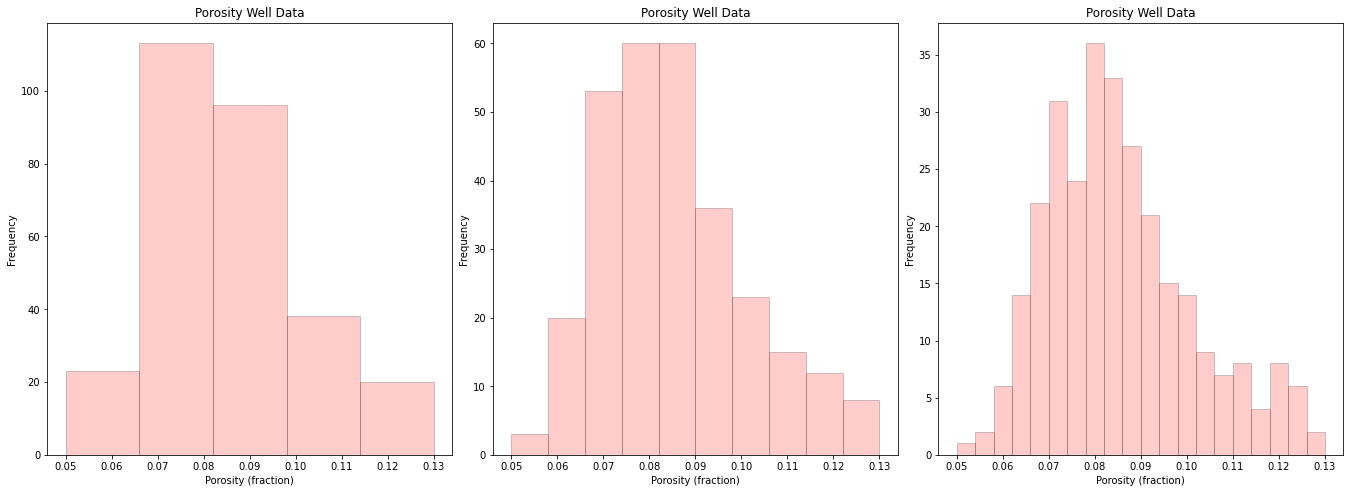

In [24]:
plt.subplot(131)
GSLIB.hist_st(data['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=5,weights = None,xlabel='Porosity (fraction)',title='Porosity Well Data')

plt.subplot(132)
GSLIB.hist_st(data['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=10,weights = None,xlabel='Porosity (fraction)',title='Porosity Well Data')

plt.subplot(133)
GSLIB.hist_st(data['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=20,weights = None,xlabel='Porosity (fraction)',title='Porosity Well Data')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.5, wspace=0.1, hspace=0.2)
plt.savefig('hist_Porosity_Multiple_bins.tif',dpi=600,bbox_inches="tight")
plt.show()

# Cumulative plots

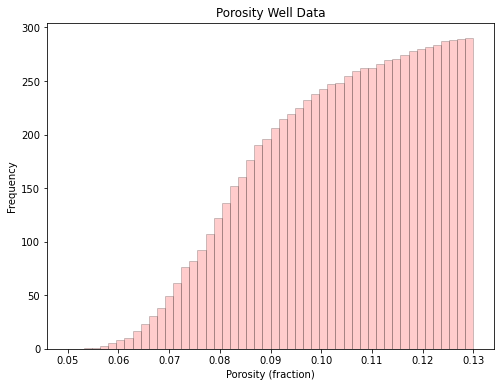

In [27]:
GSLIB.hist(data['Porosity'].values,pormin,pormax,log=False,cumul = True,bins=50,weights = None,xlabel='Porosity (fraction)',title='Porosity Well Data',fig_name='hist_Porosity_CDF')

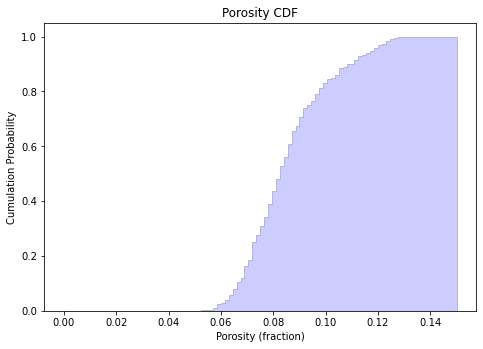

In [29]:
plt.hist(data['Porosity'].values,density=True, cumulative=True, label='CDF',
           histtype='stepfilled', alpha=0.2, bins = 100, color='blue', edgecolor = 'black', range=[0.0,0.15])
plt.xlabel('Porosity (fraction)')
plt.title('Porosity CDF')
plt.ylabel('Cumulation Probability')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.1, hspace=0.2)
plt.savefig('cdf_Porosity.tif',dpi=600,bbox_inches="tight")
plt.show()

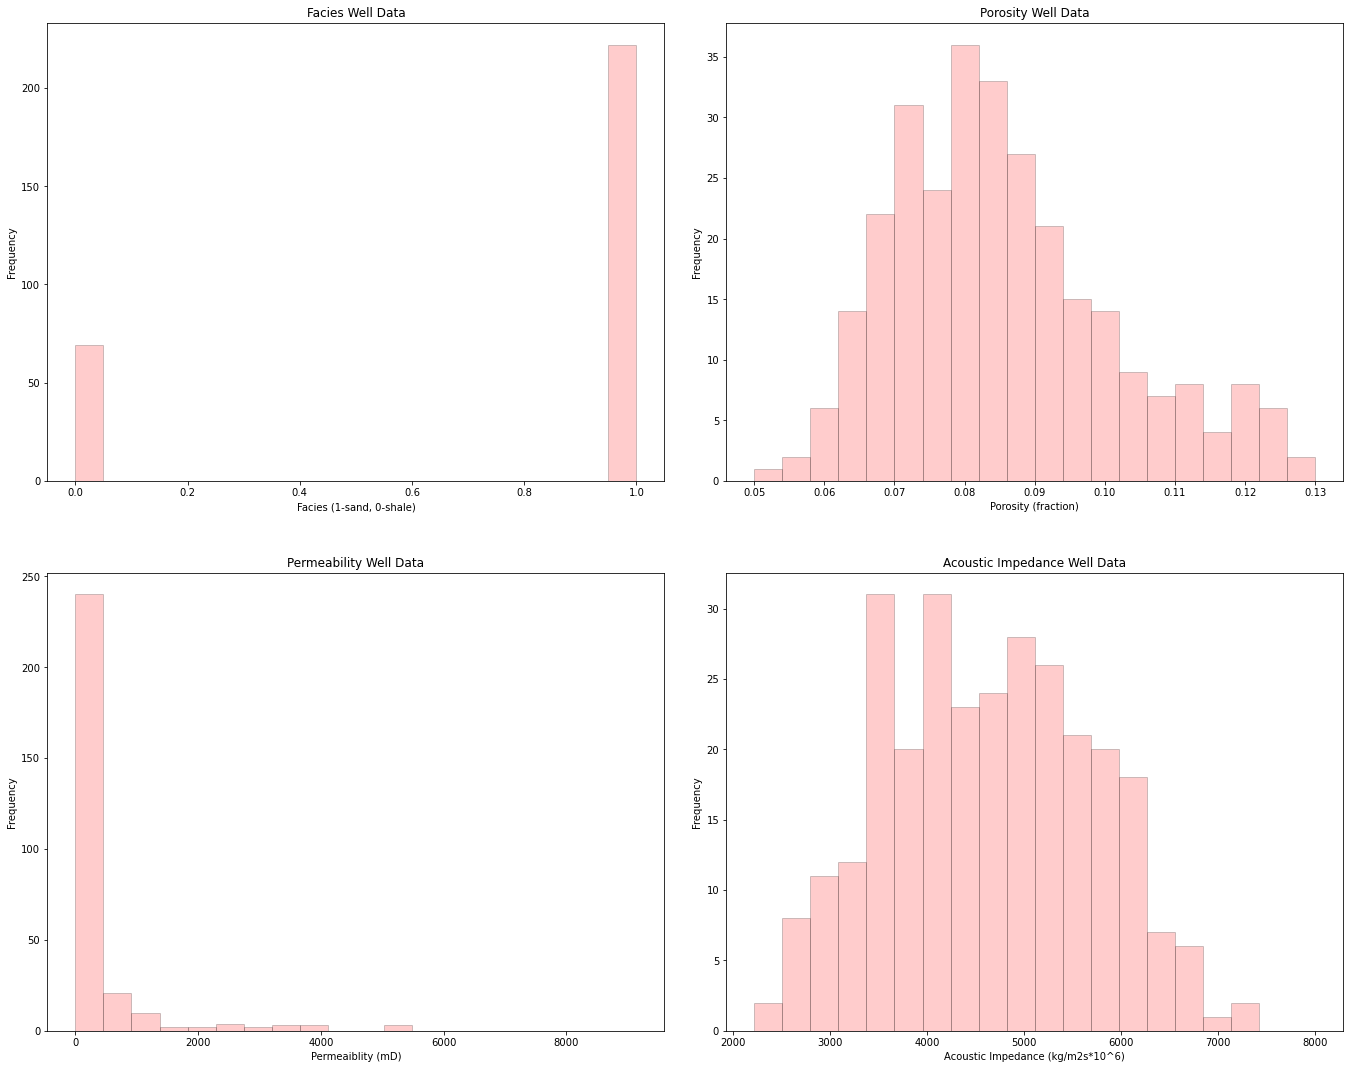

In [30]:
permmin = 0.02; permmax = 9141;                # user specified min and max
AImin = 2214.0; AImax = 8000
Fmin = 0; Fmax = 1

plt.subplot(221)
GSLIB.hist_st(data['Facies'].values,Fmin,Fmax,log=False,cumul = False,bins=20,weights = None,xlabel='Facies (1-sand, 0-shale)',title='Facies Well Data')

plt.subplot(222)
GSLIB.hist_st(data['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=20,weights = None,xlabel='Porosity (fraction)',title='Porosity Well Data')

plt.subplot(223)
GSLIB.hist_st(data['Perm'].values,permmin,permmax,log=False,cumul = False,bins=20,weights = None,xlabel='Permeaiblity (mD)',title='Permeability Well Data')

plt.subplot(224)
GSLIB.hist_st(data['AI'].values,AImin,AImax,log=False,cumul = False,bins=20,weights = None,xlabel='Acoustic Impedance (kg/m2s*10^6)',title='Acoustic Impedance Well Data')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.5, wspace=0.1, hspace=0.2)
plt.savefig('hist_Porosity_Multiple_bins.tif',dpi=600,bbox_inches="tight")
plt.show()